<a href="https://colab.research.google.com/github/Shriharsh-Deshmukh/100-Days-100-Models/blob/main/(Pr_6)iris_SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import necessary libraries**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## **loading dataset**

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])


## **Data preprocessing**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **Training Support Vector Machine model**

In [5]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train.values.ravel())

SVC(kernel='linear', random_state=42)

## **Make predictions**

In [6]:
y_pred = svm_model.predict(X_test)

## **Evaluate the model**

In [7]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## **Visualization**

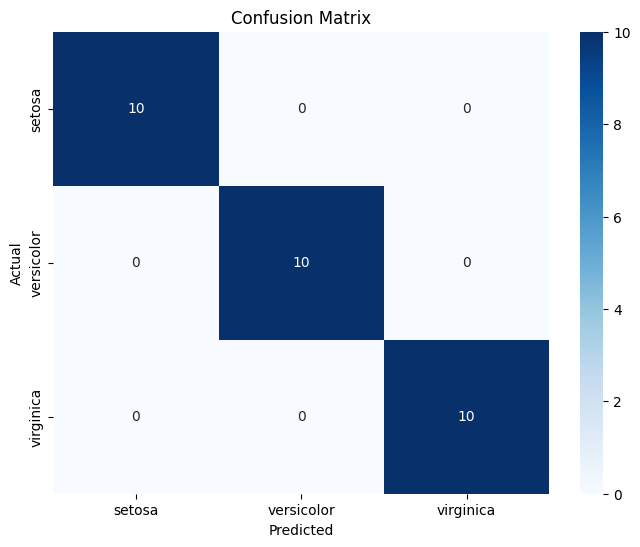

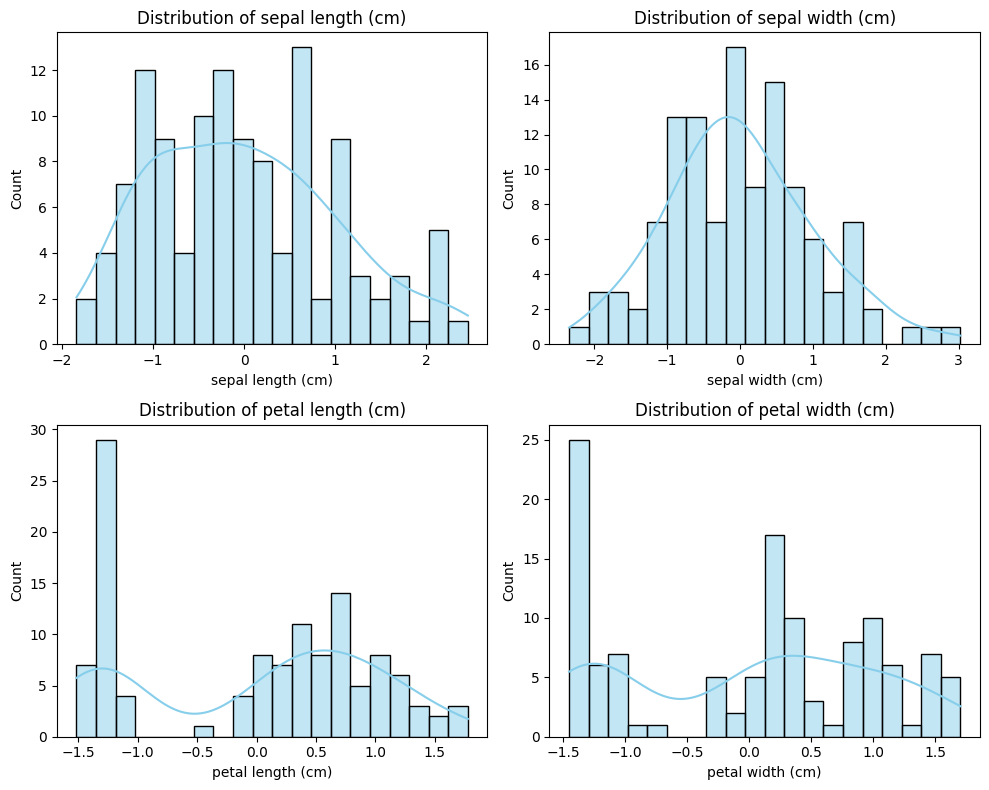

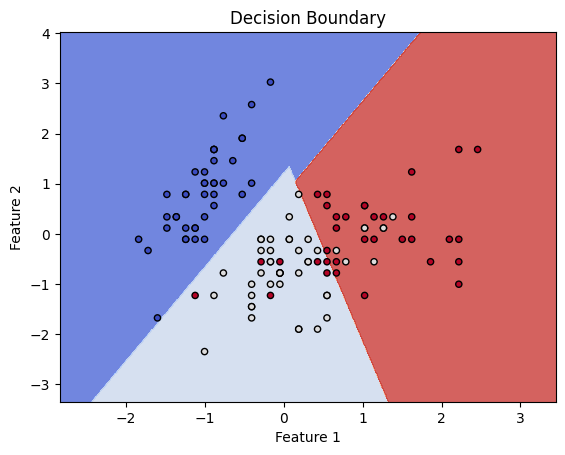

In [8]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting feature distributions for standardized data
X_train_df = pd.DataFrame(X_train, columns=data.feature_names)
plt.figure(figsize=(10, 8))
for i, column in enumerate(X_train_df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X_train_df[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Visualizing decision boundary (only for 2D projections)
def plot_decision_boundary(X, y, model):
    X = np.array(X)
    y = np.array(y).ravel()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap='coolwarm')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Only plot decision boundary for two features (for simplicity)
X_2D = X.iloc[:, :2]  # Use the first two features
X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_2D, y, test_size=0.2, random_state=42, stratify=y)
scaler_2D = StandardScaler()
X_train_2D = scaler_2D.fit_transform(X_train_2D)
X_test_2D = scaler_2D.transform(X_test_2D)
svm_model_2D = SVC(kernel='linear', random_state=42)
svm_model_2D.fit(X_train_2D, y_train_2D.values.ravel())
plot_decision_boundary(X_train_2D, y_train_2D, svm_model_2D)
